In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('jobs.csv')

In [2]:
data.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [3]:
data.shape

(27010, 8)

In [4]:
data.isnull().sum()

Unnamed: 0                 0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

In [5]:
data.describe()

,Unnamed: 0
count,27010.000000
mean,14973.197260
std,8661.925267
min,0.000000
25%,7474.250000
50%,14913.500000
75%,22476.500000
max,29999.000000


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [7]:
data = data.drop("Unnamed: 0",axis=1)

In [12]:
def generate_wordcloud(data, column_name):
    text = " ".join(i for i in data[column_name])
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
    plt.figure( figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

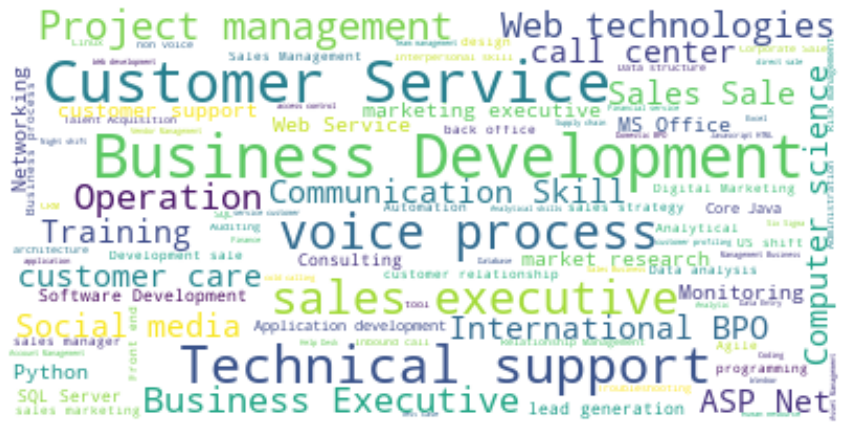

In [15]:
generate_wordcloud(data,'Key Skills')

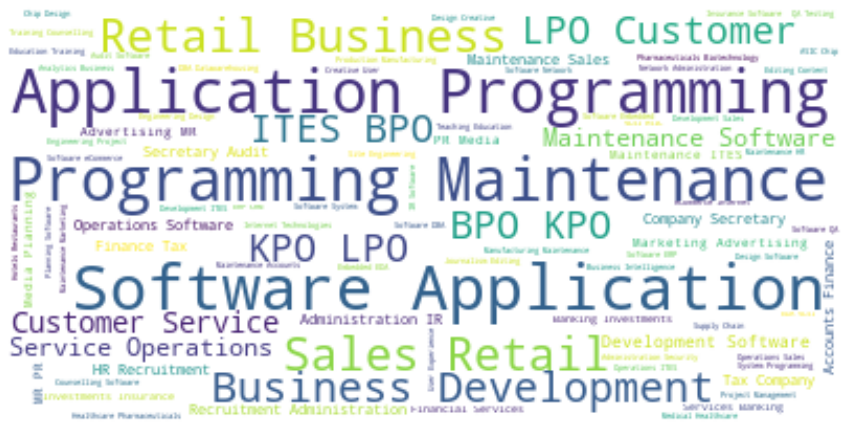

In [16]:
generate_wordcloud(data,'Functional Area')

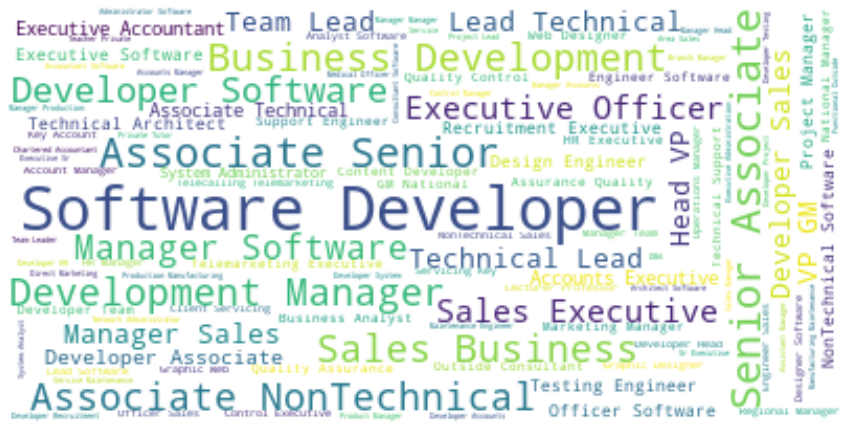

In [17]:
generate_wordcloud(data,'Job Title')

In [18]:
#Creating a Content-Based Recommendation System
from sklearn.feature_extraction import text
feature = data["Key Skills"].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [19]:
text

<module 'sklearn.feature_extraction.text' from '/usr/local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py'>

In [20]:
feature

[' Media Planning| Digital Media',
 ' pre sales| closing| software knowledge| clients| requirements| negotiating| client| online bidding| good communication| technology',
 ' Computer science| Fabrication| Quality check| Intellectual property| Electronics| Support services| Research| Management| Human resource management| Research Executive',
 ' Technical Support',
 ' manual testing| test engineering| test cases| web testing| web technologies',
 ' adobe experience manager| digital| digital marketing| adobe analytics| data analytics| aem| adobe| sitecatalyst',
 ' channel partners| real estate| negotiation| property| Residential Sales',
 ' TFS| Azure| Git| VSTS| Docker| DynaTrace| Splunk| AWS',
 ' Bde',
 ' technical support| support services| application support| communication skills| voice based process| semi voice| semi voice process',
 ' secretary| executive assistant| ea',
 ' website| web analytics| xml| link building| google analytics| case studies| seo| social media| tracking| maint

In [21]:
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [24]:
indices

Job Title
Media Planning Executive/Manager                  0
Sales Executive/Officer                           1
R&D Executive                                     2
Technical Support Engineer                        3
Testing Engineer                                  4
                                              ...  
Software Developer                            27005
Operations Manager                            27006
Lecturer/Professor                            27007
Software Developer                            27008
Search Engine Optimisation /SEO Specialist    27009
Length: 27010, dtype: int64

In [29]:
#Now here’s how to write a function to recommend jobs according to the skills required for the job role:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

jobs_recommendation("Testing Engineer")

,Job Title,Job Experience Required,Key Skills
401,Social Media Marketing Manager,0 - 1 yrs,website| facebook| online| Twitter| seo| inte...
400,Software Developer,3 - 8 yrs,Salesforce Developer| sfdc developer| Salesforce
399,Production Manager,10 - 15 yrs,Production Management| Weld Shop| Press Shop|...
398,Head/VP/GM/National Manager -Sales,3 - 8 yrs,Equity| Currency| Mutual Funds| Commodities| ...
397,Sales/Business Development Manager,1 - 3 yrs,ERP| RF| Action plan| Relationship| Software s...
